In [ ]:
# install.packages(c("quantmod", "tseries", "timeSeries", "forecast", "xts"))
# # Install and load the randtests package
# install.packages("randtests")


# Abstract

This project aims to forecast the closing price of TSLA stock using an ARIMA (AutoRegressive Integrated Moving Average) model. The project begins with data collection from Yahoo Finance, followed by data preprocessing and exploratory data analysis to understand the underlying patterns in the time series. An ARIMA model is then fitted to the data, and diagnostic checks are performed to assess the model's adequacy. However, despite initial efforts, the ARIMA model's forecast plot appears as a straight line, indicating potential limitations in capturing the variability of the data. Further investigation reveals the need for model refinement, including parameter optimization and consideration of external factors, to improve forecast accuracy. Overall, this project highlights the challenges and considerations involved in time series forecasting using ARIMA models and underscores the importance of iterative refinement and evaluation in achieving accurate predictions.

# 1- Introduction


The forecasting of stock prices is a challenging yet critical task in financial analysis, with significant implications for investors, traders, and financial institutions. Accurate predictions of stock prices can help stakeholders make informed decisions, optimize investment strategies, and mitigate financial risks. Among the multitude of stocks available for investment, Tesla Inc. (TSLA) stands out as a prominent and widely followed company in the electric vehicle (EV) industry, making it an intriguing subject for stock price prediction.

This project focuses on forecasting the closing price of TSLA stock using time series analysis techniques, specifically employing the AutoRegressive Integrated Moving Average (ARIMA) model. The TSLA dataset spans from March 20, 2019, to March 20, 2024, and is sourced from Yahoo Finance. It includes essential features such as opening price, high price, low price, closing price, and trading volume. Analyzing and forecasting the TSLA stock price holds significance due to the company's influence in the EV market, its volatile stock behavior, and the interest it garners from investors worldwide.

Given the dynamic nature of the stock market and the diverse factors influencing stock prices, developing an accurate forecasting model for TSLA stock holds immense value. By examining historical trends and patterns in TSLA's stock price data, this project seeks to contribute to the understanding of stock market dynamics and provide insights into potential future price movements. Additionally, the application of time series forecasting techniques to TSLA stock data offers valuable implications for investors, financial analysts, and researchers interested in understanding and predicting stock market behavior.

# 2- Methodology


# 2.1 - Exploratory Data Analysis (EDA)

In [ ]:
# imports
library(quantmod)
library(tseries)
library(timeSeries)
library(forecast)
library(xts)
library(randtests)



In [ ]:
tesla_ticker = "TSLA" # Tesla stock symbol

start_date = "2019-03-20"
end_date = "2024-03-20"

# Pull the data from Yahoo Finance
getSymbols(tesla_ticker, from=start_date, to = end_date)

[1] "TSLA"

In [ ]:
class(TSLA)

[1] "xts" "zoo"

In [ ]:
dim(TSLA)

[1] 1259    6

 The object has $1259$ rows and $6$ *columns*

In [ ]:
head(TSLA)

           TSLA.Open TSLA.High TSLA.Low TSLA.Close TSLA.Volume TSLA.Adjusted
2019-03-20  17.97933  18.33133 17.75333   18.24000   103623000      18.24000
2019-03-21  18.17333  18.43000 17.89667   18.26800    89206500      18.26800
2019-03-22  18.17200  18.18667 17.60000   17.63533   131184000      17.63533
2019-03-25  17.31400  17.54533 16.96400   17.36133   153225000      17.36133
2019-03-26  17.62933  18.01733 17.62867   17.85133   110263500      17.85133
2019-03-27  17.91667  18.35800 17.87867   18.32200   131688000      18.32200

In [ ]:
tail(TSLA)

           TSLA.Open TSLA.High TSLA.Low TSLA.Close TSLA.Volume TSLA.Adjusted
2024-03-12    177.77    179.43   172.41     177.54    87391700        177.54
2024-03-13    173.05    176.05   169.15     169.48   106524500        169.48
2024-03-14    167.77    171.17   160.51     162.50   126325700        162.50
2024-03-15    163.16    165.18   160.76     163.57    96971900        163.57
2024-03-18    170.02    174.72   165.90     173.80   108214400        173.80
2024-03-19    172.36    172.82   167.42     171.32    77271400        171.32

Each column in the `TSLA` object represents a specific attribute  associated with Tesla's stock price data.

1. **TSLA.Open**: This column represents the opening price of Tesla's stock on a given trading day. The opening price is the price at which the first trade of the day occurred.

2. **TSLA.High**: This column represents the highest price of Tesla's stock reached during the trading day.

3. **TSLA.Low**: This column represents the lowest price of Tesla's stock reached during the trading day.

4. **TSLA.Close**: This column represents the closing price of Tesla's stock on a given trading day. The closing price is the price at which the last trade of the day occurred.

5. **TSLA.Volume**: This column represents the volume of Tesla's stock traded during the trading day. Volume refers to the total number of shares that were traded.

6. **TSLA.Adjusted**: This column represents the adjusted closing price of Tesla's stock on a given trading day. The adjusted closing price accounts for any corporate actions, such as dividends or stock splits, that may have occurred. Adjusted prices are often used for historical comparisons and analysis because they reflect the true economic performance of the stock.


### **Data Cleaning**

In [ ]:
# Check for duplicates
duplicates <- TSLA[duplicated(index(TSLA)), ]
if (nrow(duplicates) > 0) {
  print("Duplicates found:")
  print(duplicates)
} else {
  print("No duplicates found.")
}

# Check for missing values
missing_values <- sum(is.na(TSLA))
if (missing_values > 0) {
  print(paste("Missing values found:", missing_values))
} else {
  print("No missing values found.")
}


[1] "No duplicates found."
[1] "No missing values found."


**Tesla closing price**



In this project, we will exclusively focus on analyzing the closing price of `TSLA` stock. This approach simplifies our analysis while enabling us to identify underlying trends and forecast future movements . By concentrating on the closing price, we gain valuable insights into market sentiment without becoming overwhelmed by intraday fluctuations. This streamlined approach strikes a balance between simplicity and effectiveness, enhancing our ability to communicate findings clearly and efficiently.


In [ ]:
TSLA_Close_Price = TSLA[, 4]

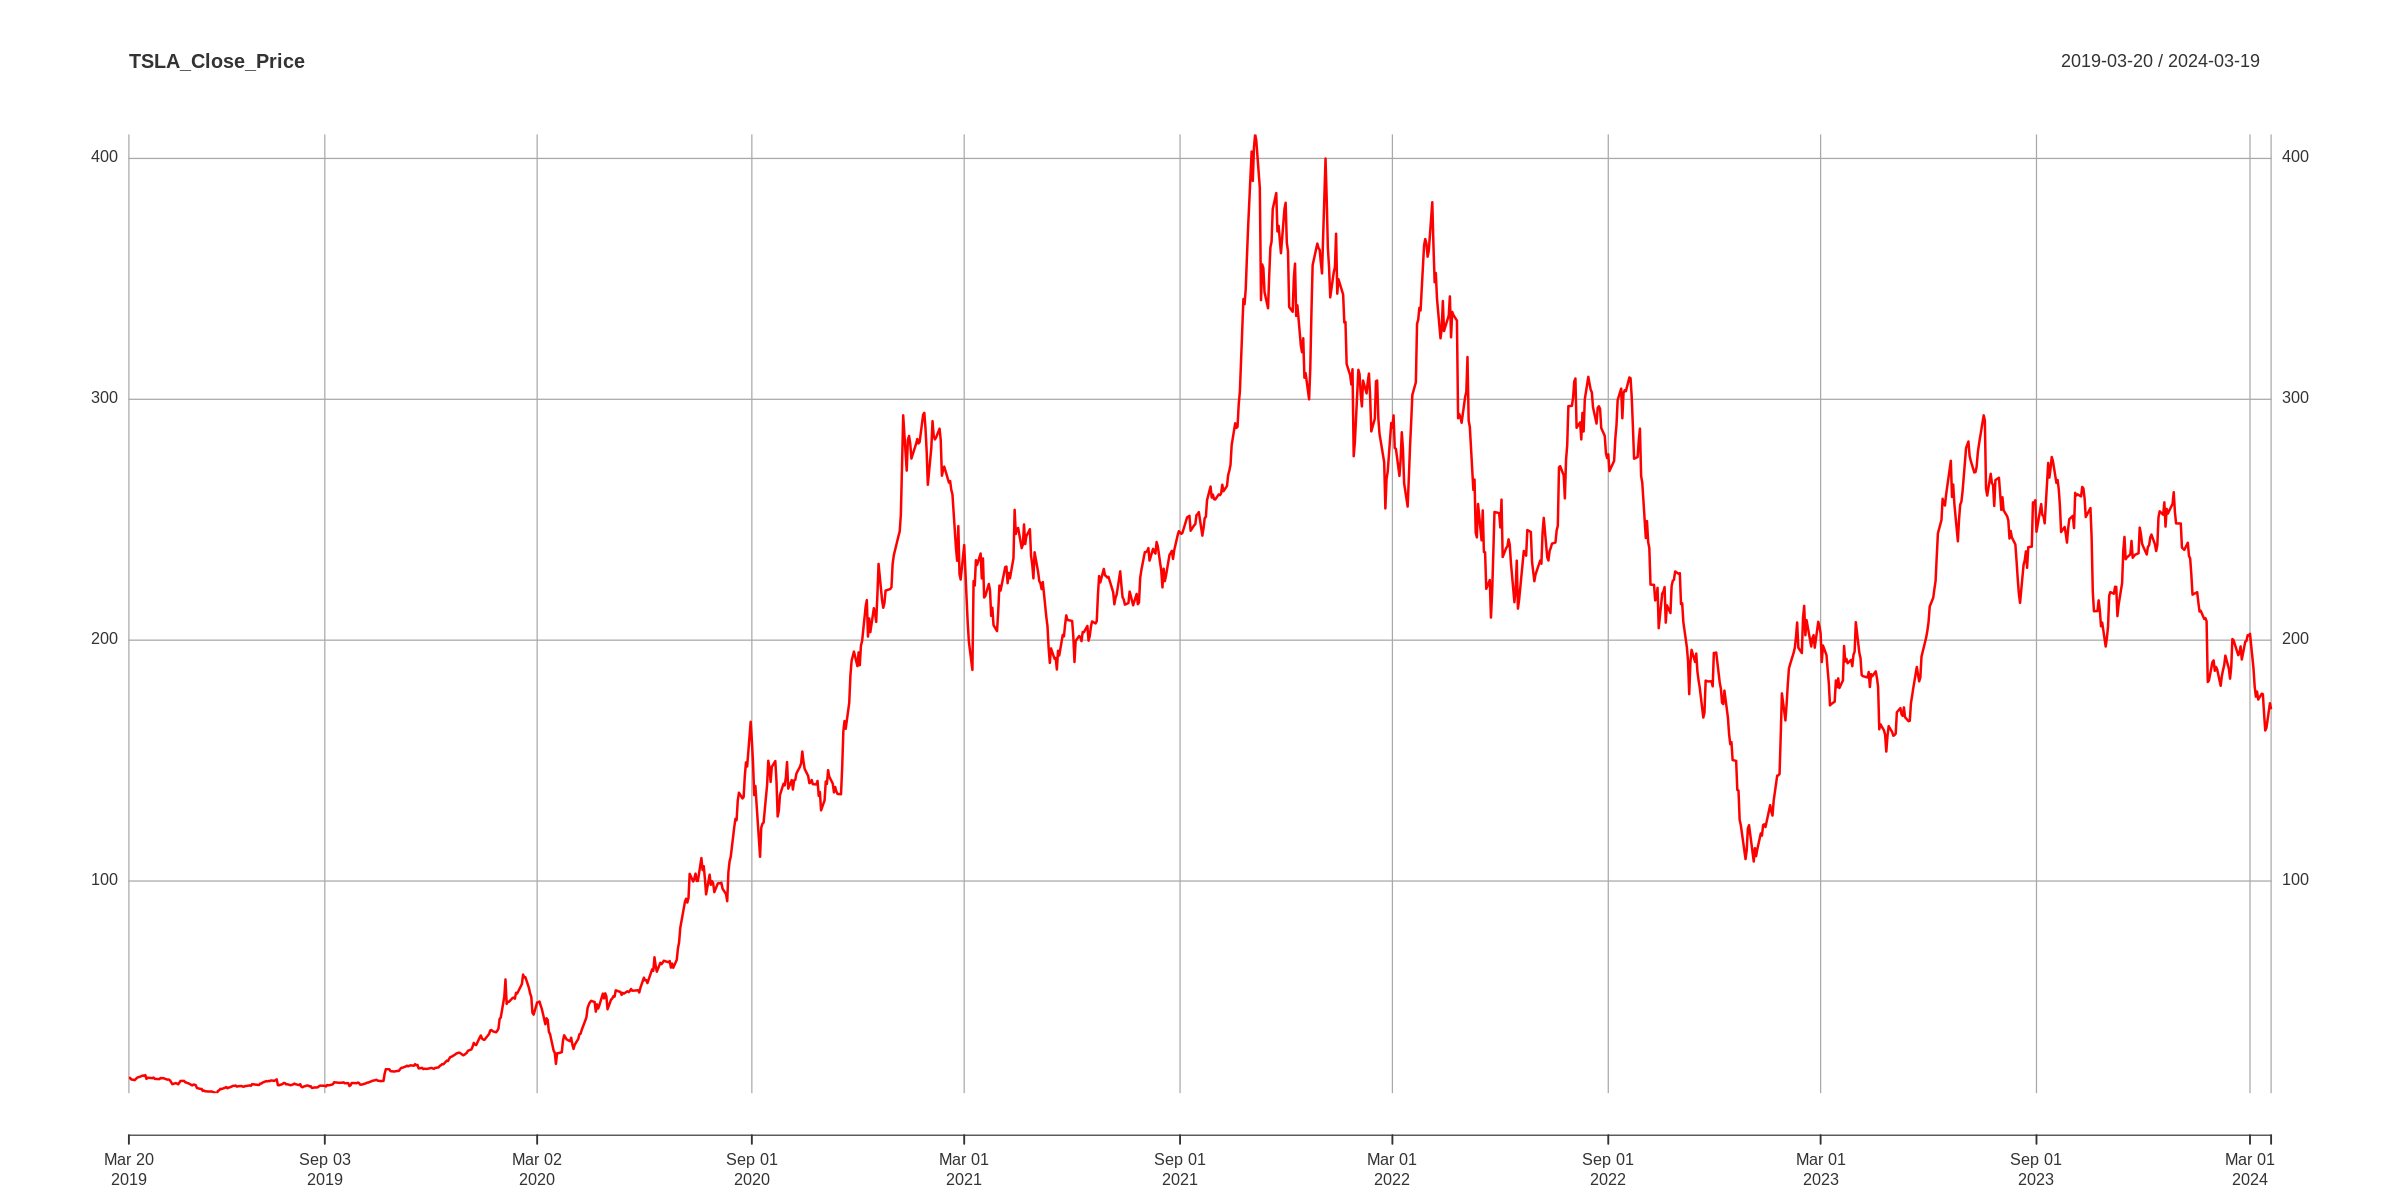

In [ ]:
options(repr.plot.width=20, repr.plot.height=10)

plot(TSLA_Close_Price, col='red')

## **Data Splitting**
Including the test set can unintentionally influences the model training process, leading to overly optimistic performance estimates and potentially poor generalization to unseen data. To prevent this, we are going to split our data.

### Split the dataset in two parts  -  80/20 traning and testing.

In [ ]:
# Define the cutoff date for splitting data
cutoff_date <- as.Date("2023-07-12") # 252 days before "2024-03-20"

In [ ]:
# Split data into training and testing sets
train_data <- TSLA_Close_Price[time(TSLA_Close_Price) < cutoff_date]
test_data <- TSLA_Close_Price[time(TSLA_Close_Price) >= cutoff_date]


# 2.2 - ARIMA Model Specification

**ARIMA**

**ARIMA** (AutoRegressive Integrated Moving Average) is a widely used time series forecasting model that combines autoregression, differencing, and moving average components. Here's a brief explanation of each component:

- **AutoRegressive (AR) Model:** This component models the relationship between an observation and a lagged set of observations (i.e., its own past values). It assumes that the current value of a time series depends linearly on its past values. The "p" parameter in ARIMA(p, d, q) represents the number of lagged observations included in the model.

- **Integrated (I) Differencing:** This component accounts for non-stationarity in the time series data by differencing the observations. Differencing involves computing the difference between consecutive observations to remove trends and make the series stationary. The "d" parameter in ARIMA(p, d, q) represents the degree of differencing applied to the data.

- **Moving Average (MA) Model:** This component models the relationship between an observation and a residual error from a moving average process applied to lagged observations. It represents the influence of past forecast errors on the current value of the time series. The "q" parameter in ARIMA(p, d, q) represents the size of the moving average window.




### **Stationarity**

From the `TSLA_Close_Price` data, we observe an increasing trend over time, indicating a strong sign of non-stationarity. To confirm our hypothesis, we will plot the autocorrelation function `(acf)` and conduct the `Augmented Dickey-Fuller` test.

**Autocorrelation Function (ACF)**

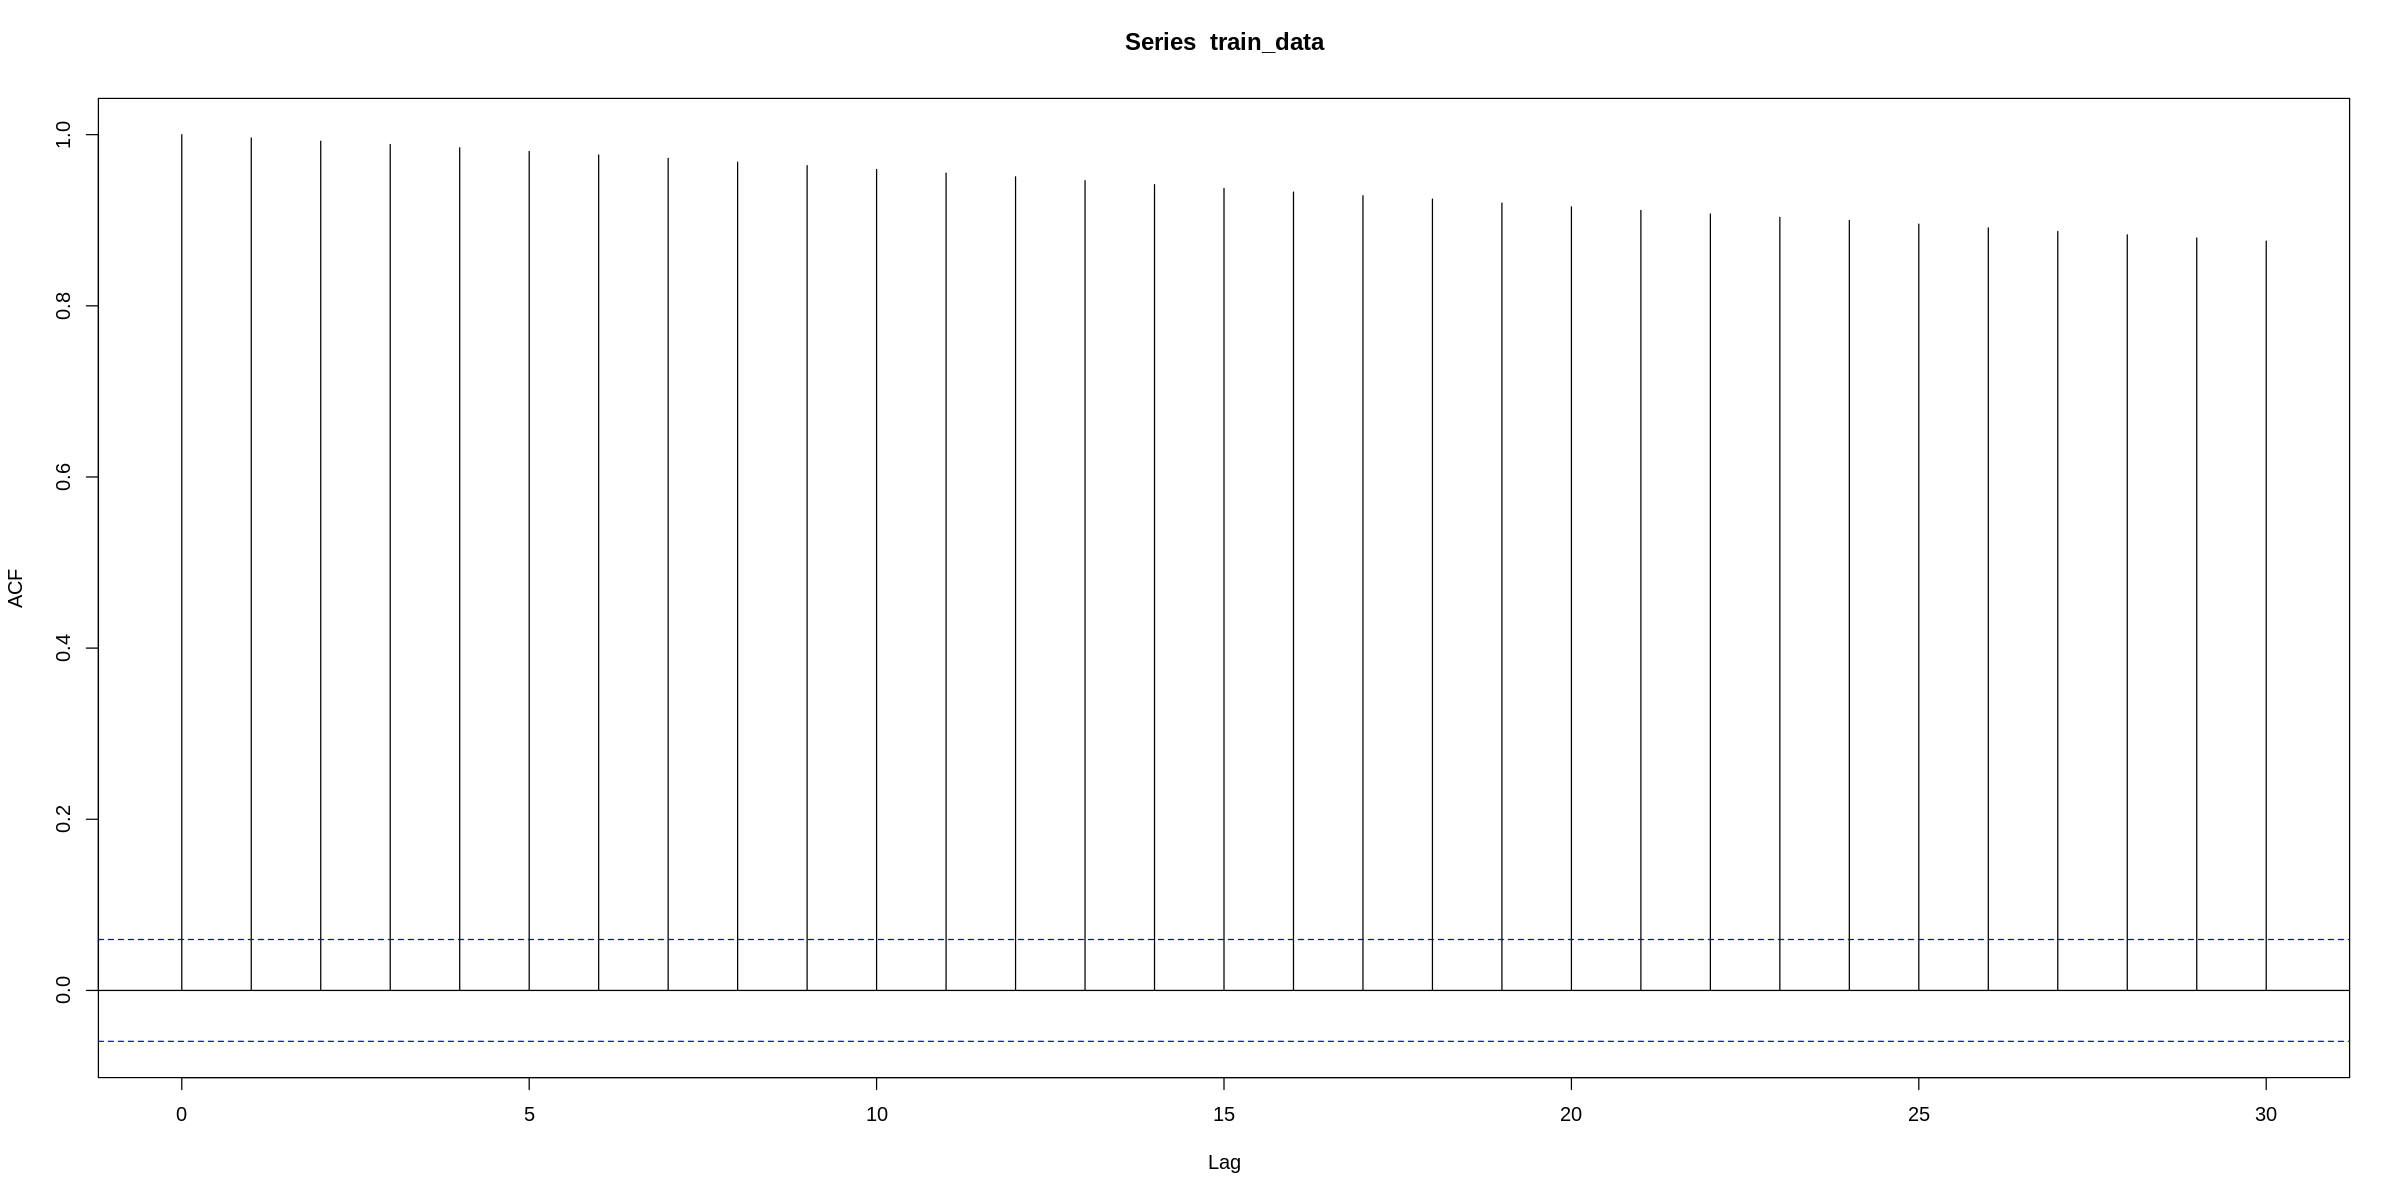

In [ ]:
acf(train_data)

We notice that the **ACF** is **slowly decaying**

**ADF**

We will use the `Augmented Dickey Fuller(ADF)` test to check if the closing price series is stationary.

The `null hypothesis` of the ADF test is that the time series is `non-stationary`. So, if the `p-value` of the test is less than the `significance level` ($0.05$) then we can reject the null hypothesis and infer that the time series is indeed stationary.

In [ ]:
print(adf.test(train_data))


	Augmented Dickey-Fuller Test

data:  train_data
Dickey-Fuller = -1.9351, Lag order = 10, p-value = 0.6058
alternative hypothesis: stationary



Since the `p-value` ($0.6058$) is greater than the  significance level, we fail to reject the null hypothesis. Therefore, there is insufficient evidence to conclude that the TSLA Close Price data is stationary.


**Differencing**

In `ARIMA` modeling, achieving stationarity in the time series data is crucial. Therefore, we perform differencing to fulfill this requirement.

In [ ]:
tsla_train_diff = diff(train_data)


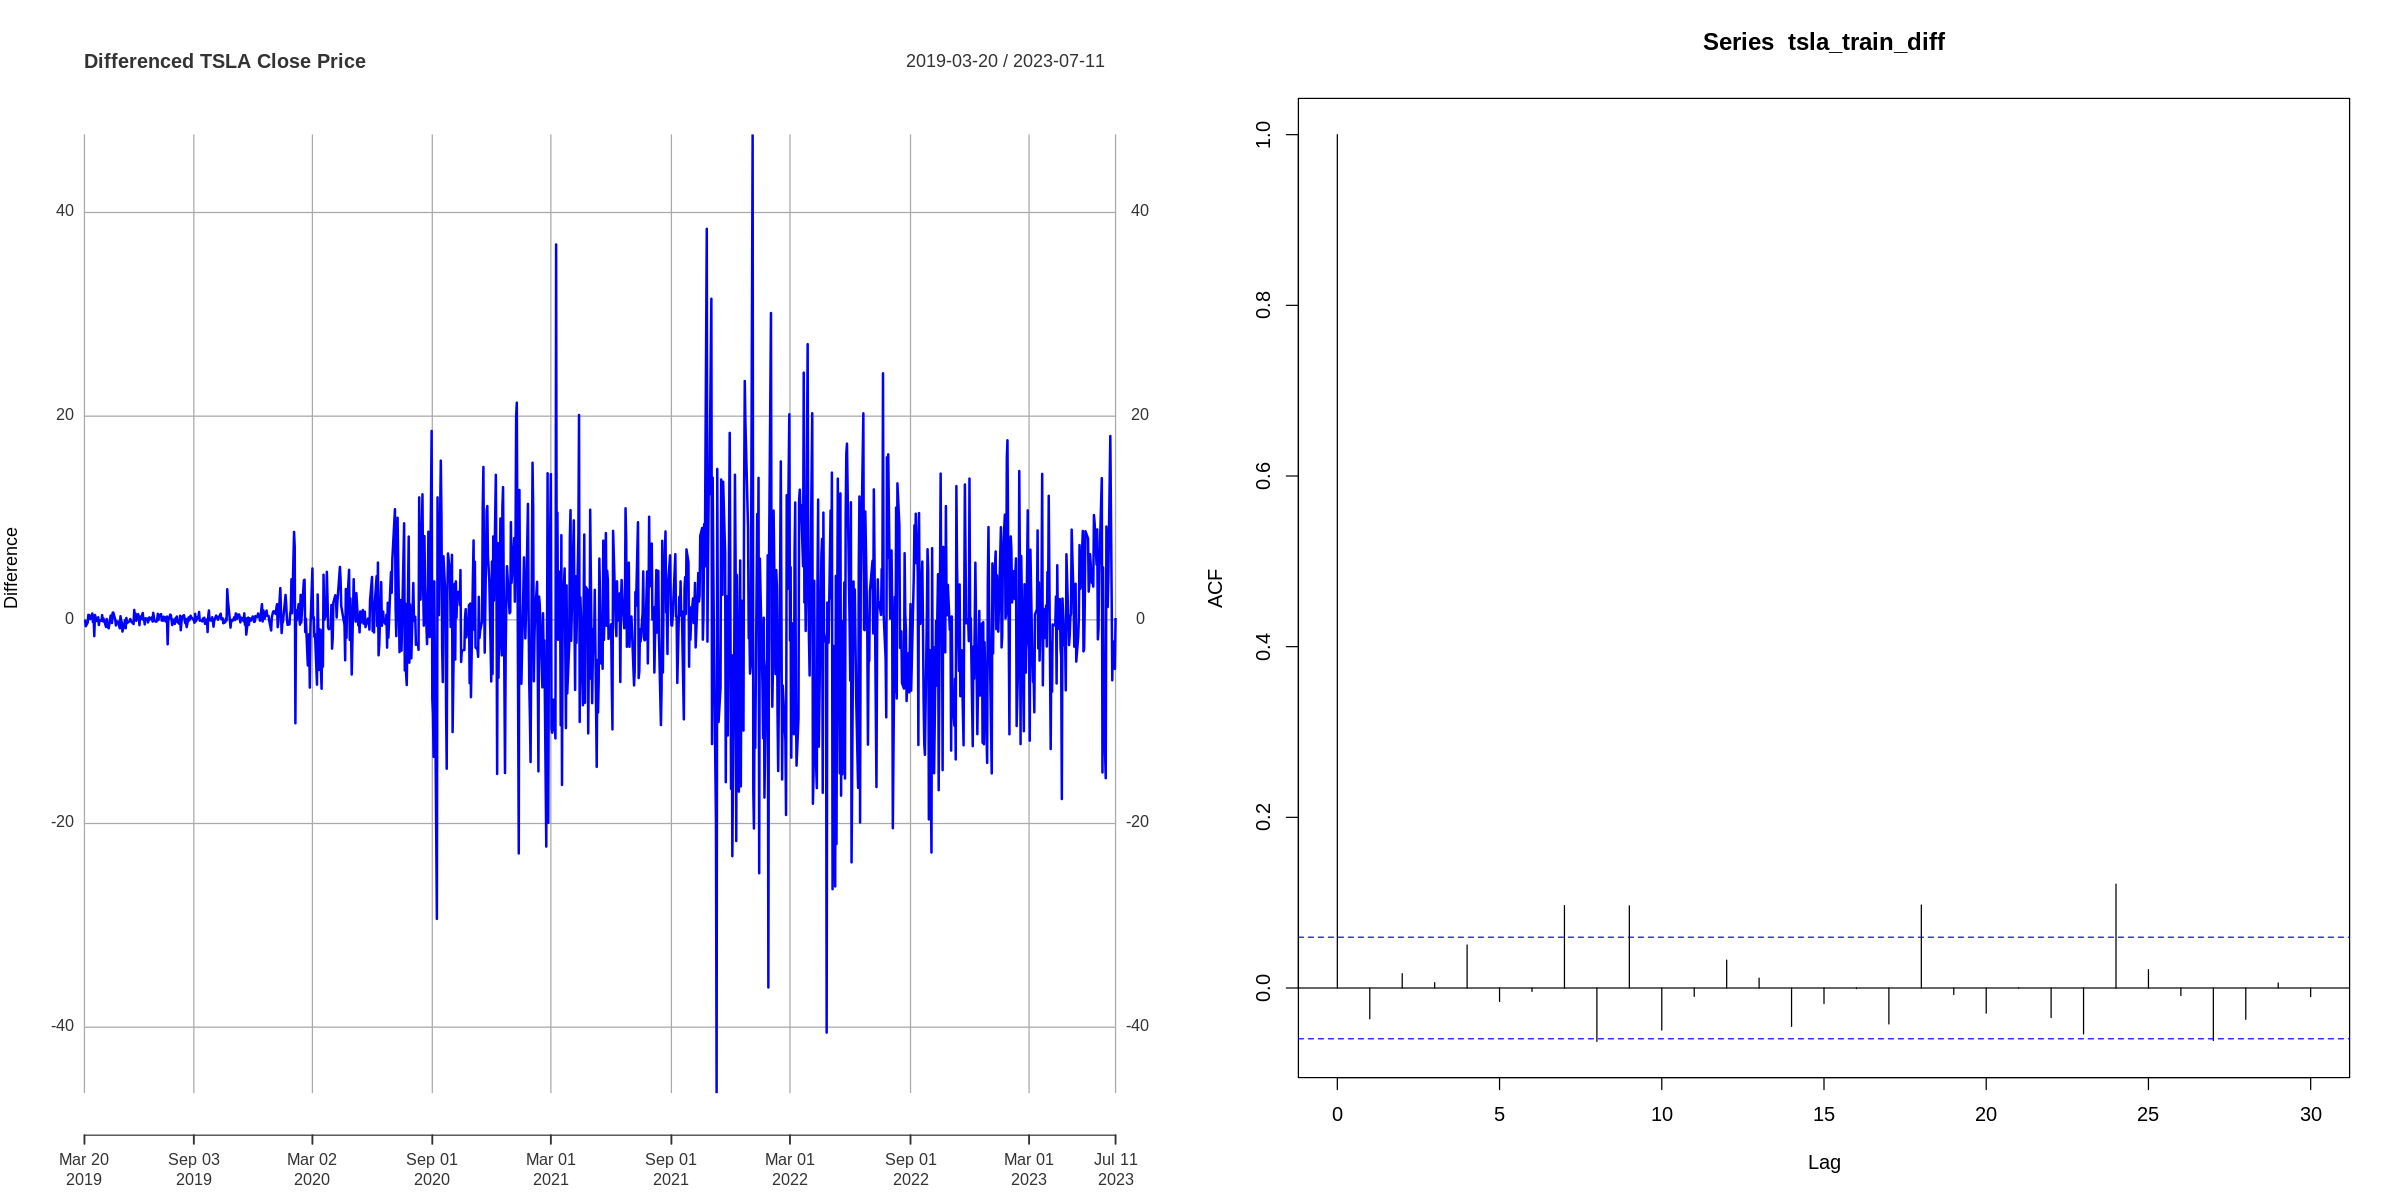

In [ ]:
par(mfrow = c(1, 2))
# Plot the differenced data
plot(tsla_train_diff, type = "l", col = "blue", main = "Differenced TSLA Close Price", xlab = "Date", ylab = "Difference")

#Let's plot the acf of the differenced data
tsla_train_diff = tsla_train_diff[!is.na(tsla_train_diff)]
acf(tsla_train_diff)


Now, we can observe that the differenced data fluctuates randomly around a mean value of zero.










**ADF**

Let's run the ADF test on the differenced data.





In [ ]:
print(adf.test(tsla_train_diff))

Warning message in adf.test(tsla_train_diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  tsla_train_diff
Dickey-Fuller = -9.3889, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary



The ADF test provides a p-value that is lower than the significance level, indicating that we have successfully addressed the non-stationarity in the data.

**Model Selection**

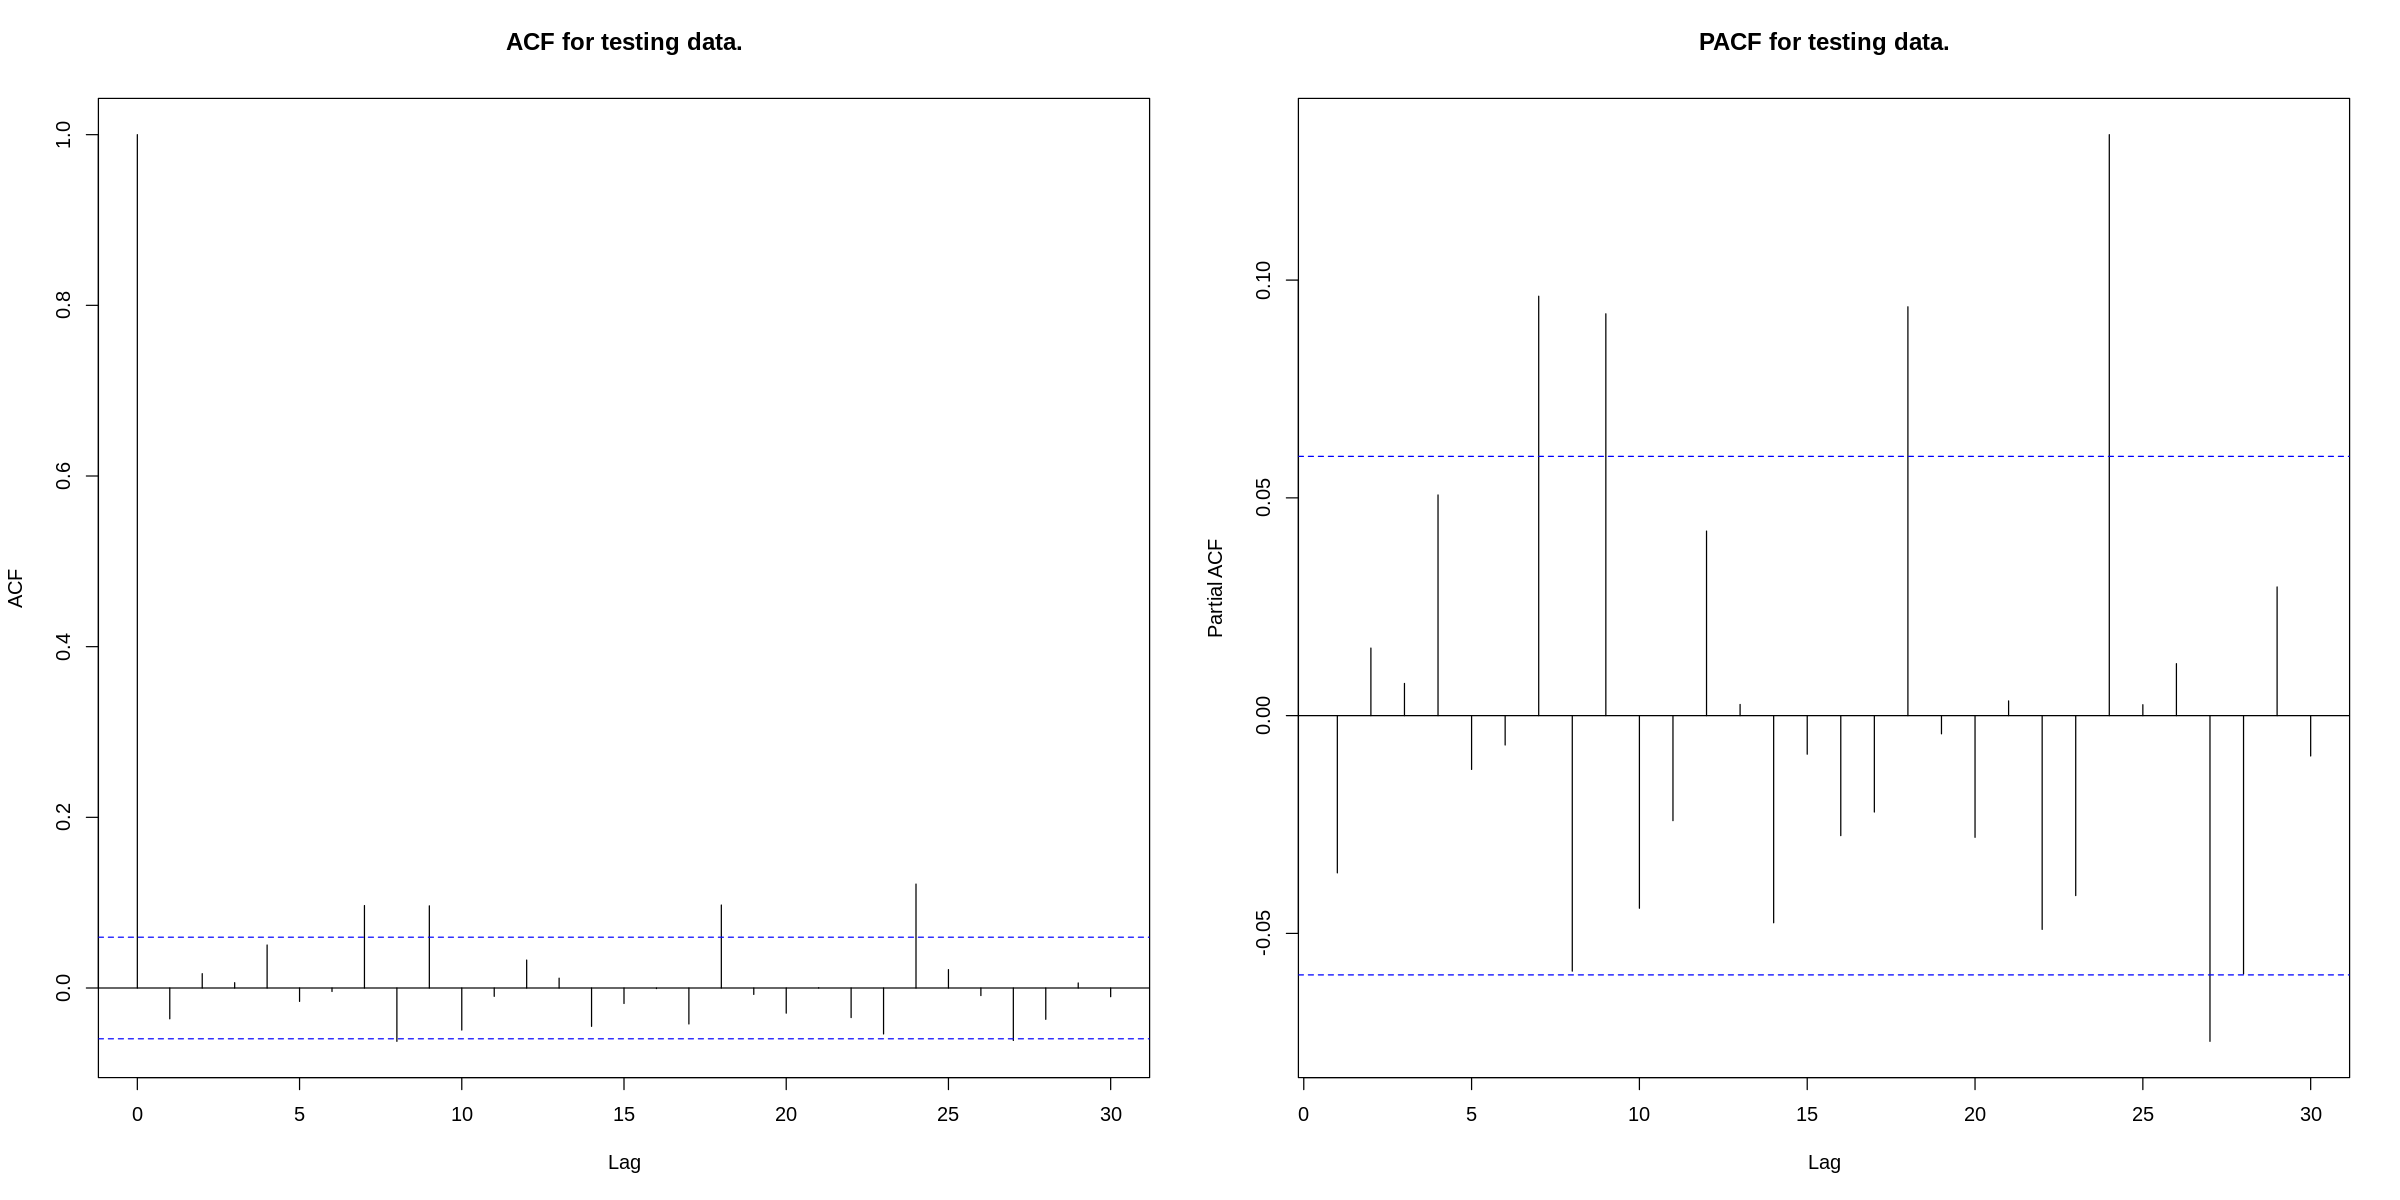

In [ ]:
par(mfrow = c(1, 2))
acf(tsla_train_diff, main="ACF for testing data.")
pacf(tsla_train_diff, main="PACF for testing data.")

The `autocorrelation function (ACF)` plot cuts off after lag 0, it suggests that there may be no significant autocorrelation in the data beyond the lag of 0

For the autoregressive (AR) part, we observe significant partial autocorrelation at different lags. Therefore, we need to determine the most suitable AR model to use.

**Either AR(0) (indicating that PACF at larger lags is just an artifact), AR(6), AR(8), AR(17), AR(23) or AR(26)**

To objectively determine the best model, we will use **BIC**



In [ ]:
candidate_orders = c(0, 6, 8, 23, 26)



In [ ]:

# Initialize vector to store BIC values
bics <- numeric(length(candidate_orders))

# Fit AR models and calculate BIC
for (i in seq_along(candidate_orders)) {
  p <- candidate_orders[i]
  ar_model <- arima(tsla_train_diff, order = c(p, 0, 0))
  bics[i] <- BIC(ar_model)
}

# Print BIC values for each model
for (i in seq_along(candidate_orders)) {
  cat("Order:", candidate_orders[i], "\tBIC:", bics[i], "\n")
}

Order: 0 	BIC: 7560.083 
Order: 6 	BIC: 7597.286 
Order: 8 	BIC: 7597.466 
Order: 23 	BIC: 7669.36 
Order: 26 	BIC: 7670.633 


In [ ]:
# Find the order with the lowest BIC
best_order <- candidate_orders[which.min(bics)]

# Print the best order based on BIC
print("Best order based on BIC:")
print(best_order)

[1] "Best order based on BIC:"
[1] 0


**Based on BIC, pick AR(0)**

# 2.3 - Fitting and Diagnostics

**Fitting the model**

In [ ]:
# Fit ARIMA model to the original training dataset
fit1 = arima(train_data, order=c(0, 1, 0))

# Generate fitted values
fitted_values1 = fitted(fit1)

# Fit ARIMA model to the differenced training dataset
fit2 = arima(tsla_train_diff, order=c(0, 0, 0))

# Generate fitted values
fitted_values2 = fitted(fit2)

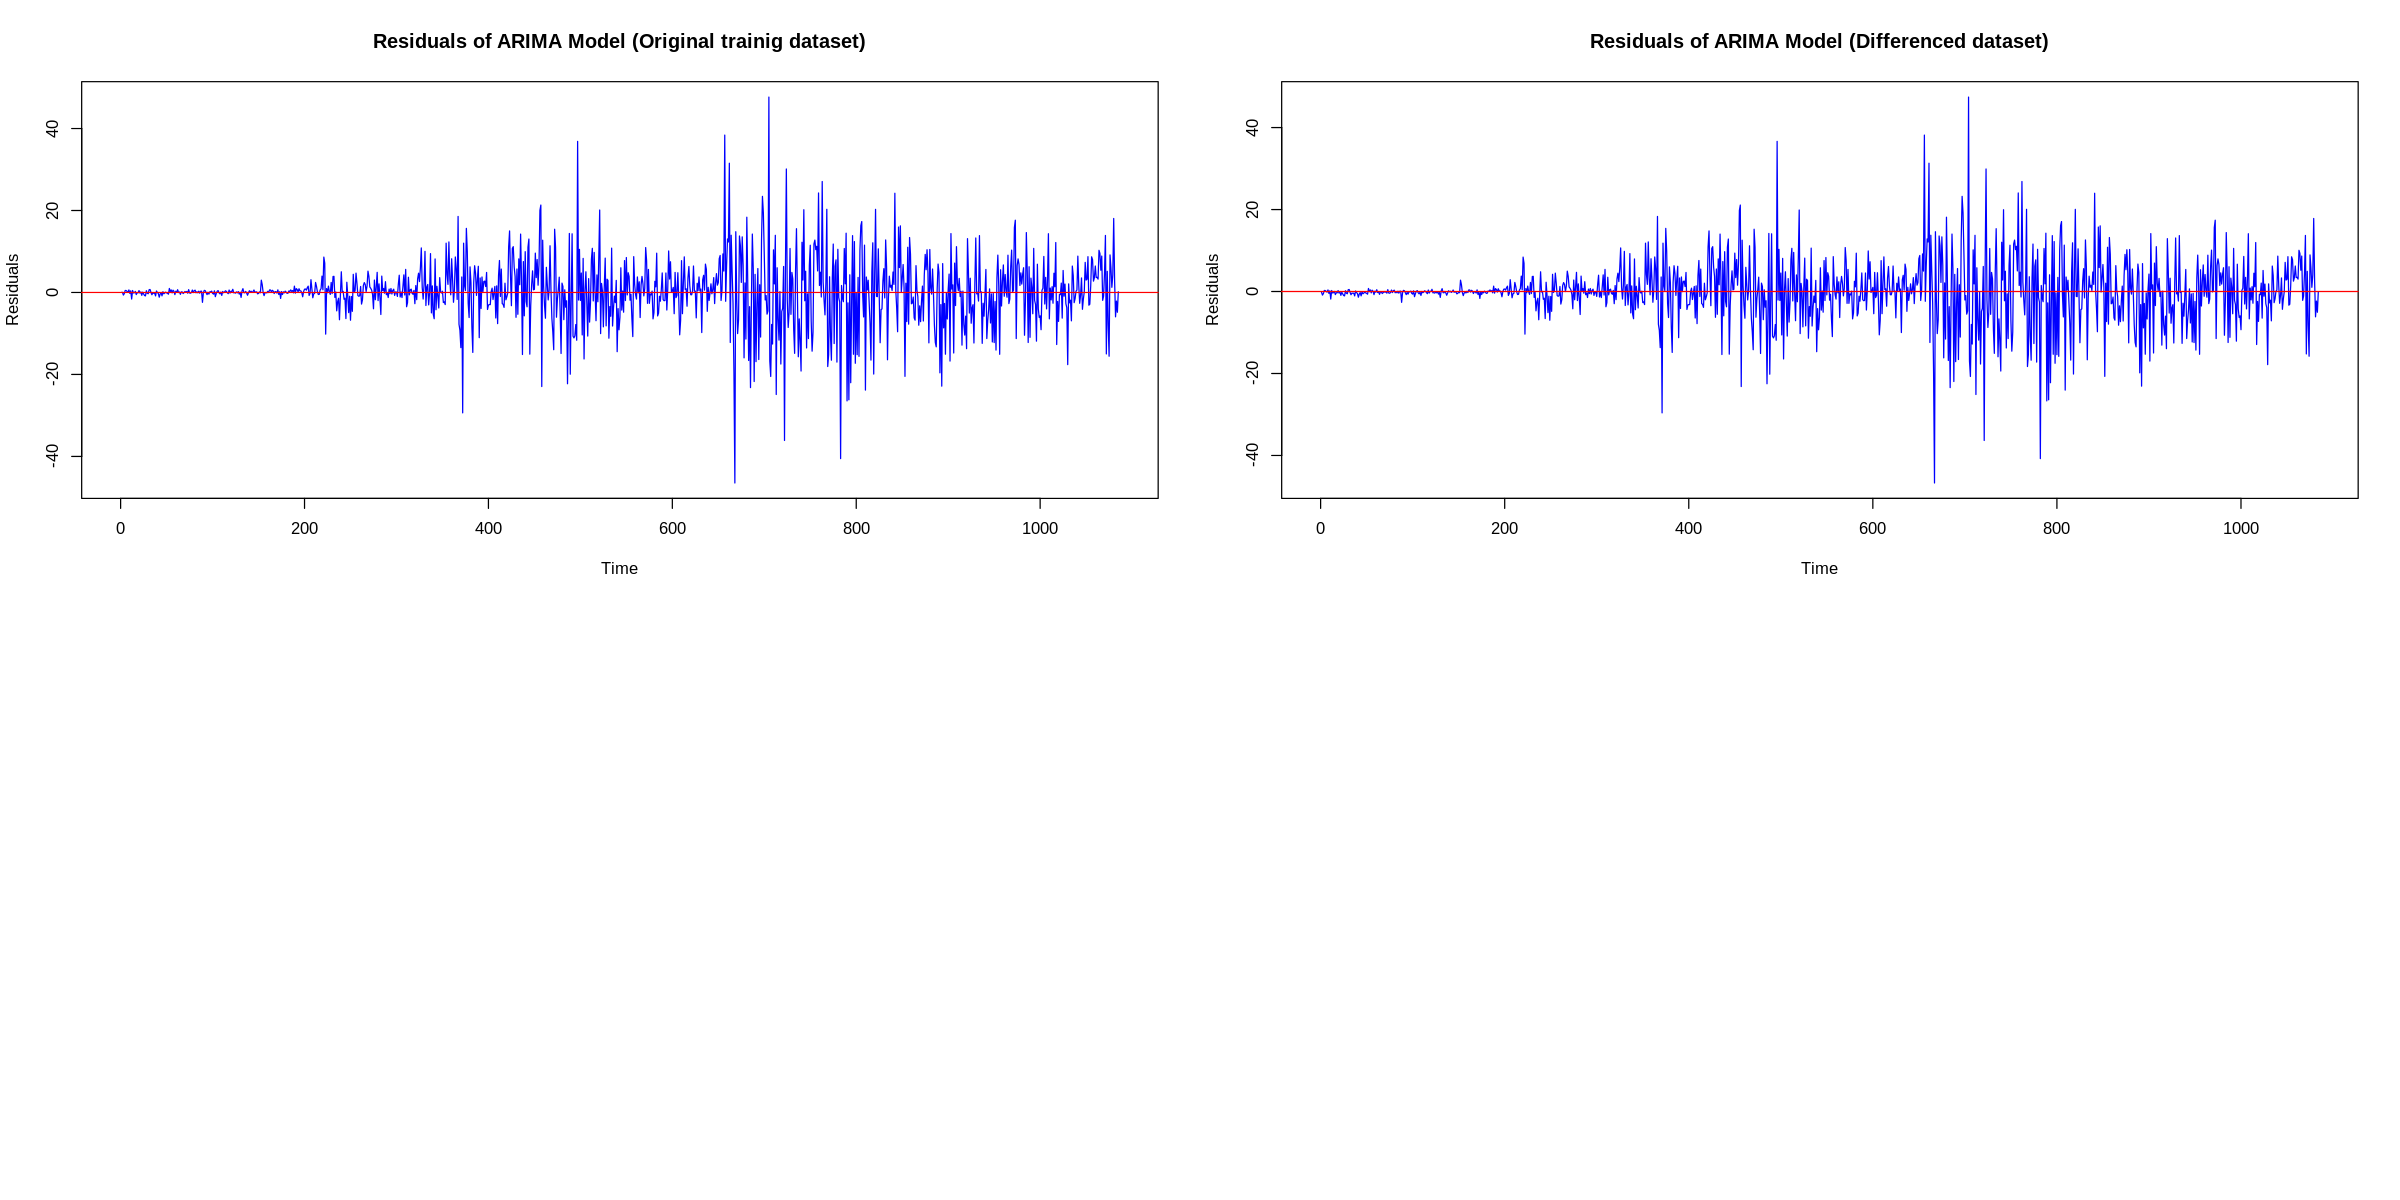

In [ ]:
par(mfrow = c(2,2))

# Extract residuals from the ARIMA model
residuals1 <- residuals(fit1)
residuals2 <- residuals(fit2)

# Plot residuals
plot(residuals1, type = "l", col = "blue", ylab = "Residuals", main = "Residuals of ARIMA Model (Original trainig dataset)")
abline(h = 0, col = "red")  # Add horizontal line at y = 0



plot(residuals2, type = "l", col = "blue", ylab = "Residuals", main = "Residuals of ARIMA Model (Differenced dataset)")
abline(h = 0, col = "red")  # Add horizontal line at y = 0





The plots indicate that residuals are evenly scattered around zero, suggesting that the ARIMA model has effectively captured the underlying patterns and trends in the data. To further our analysis of residuals, we will assess their normality and randomness by conducting statistical tests.

**Performing Diagnostics**

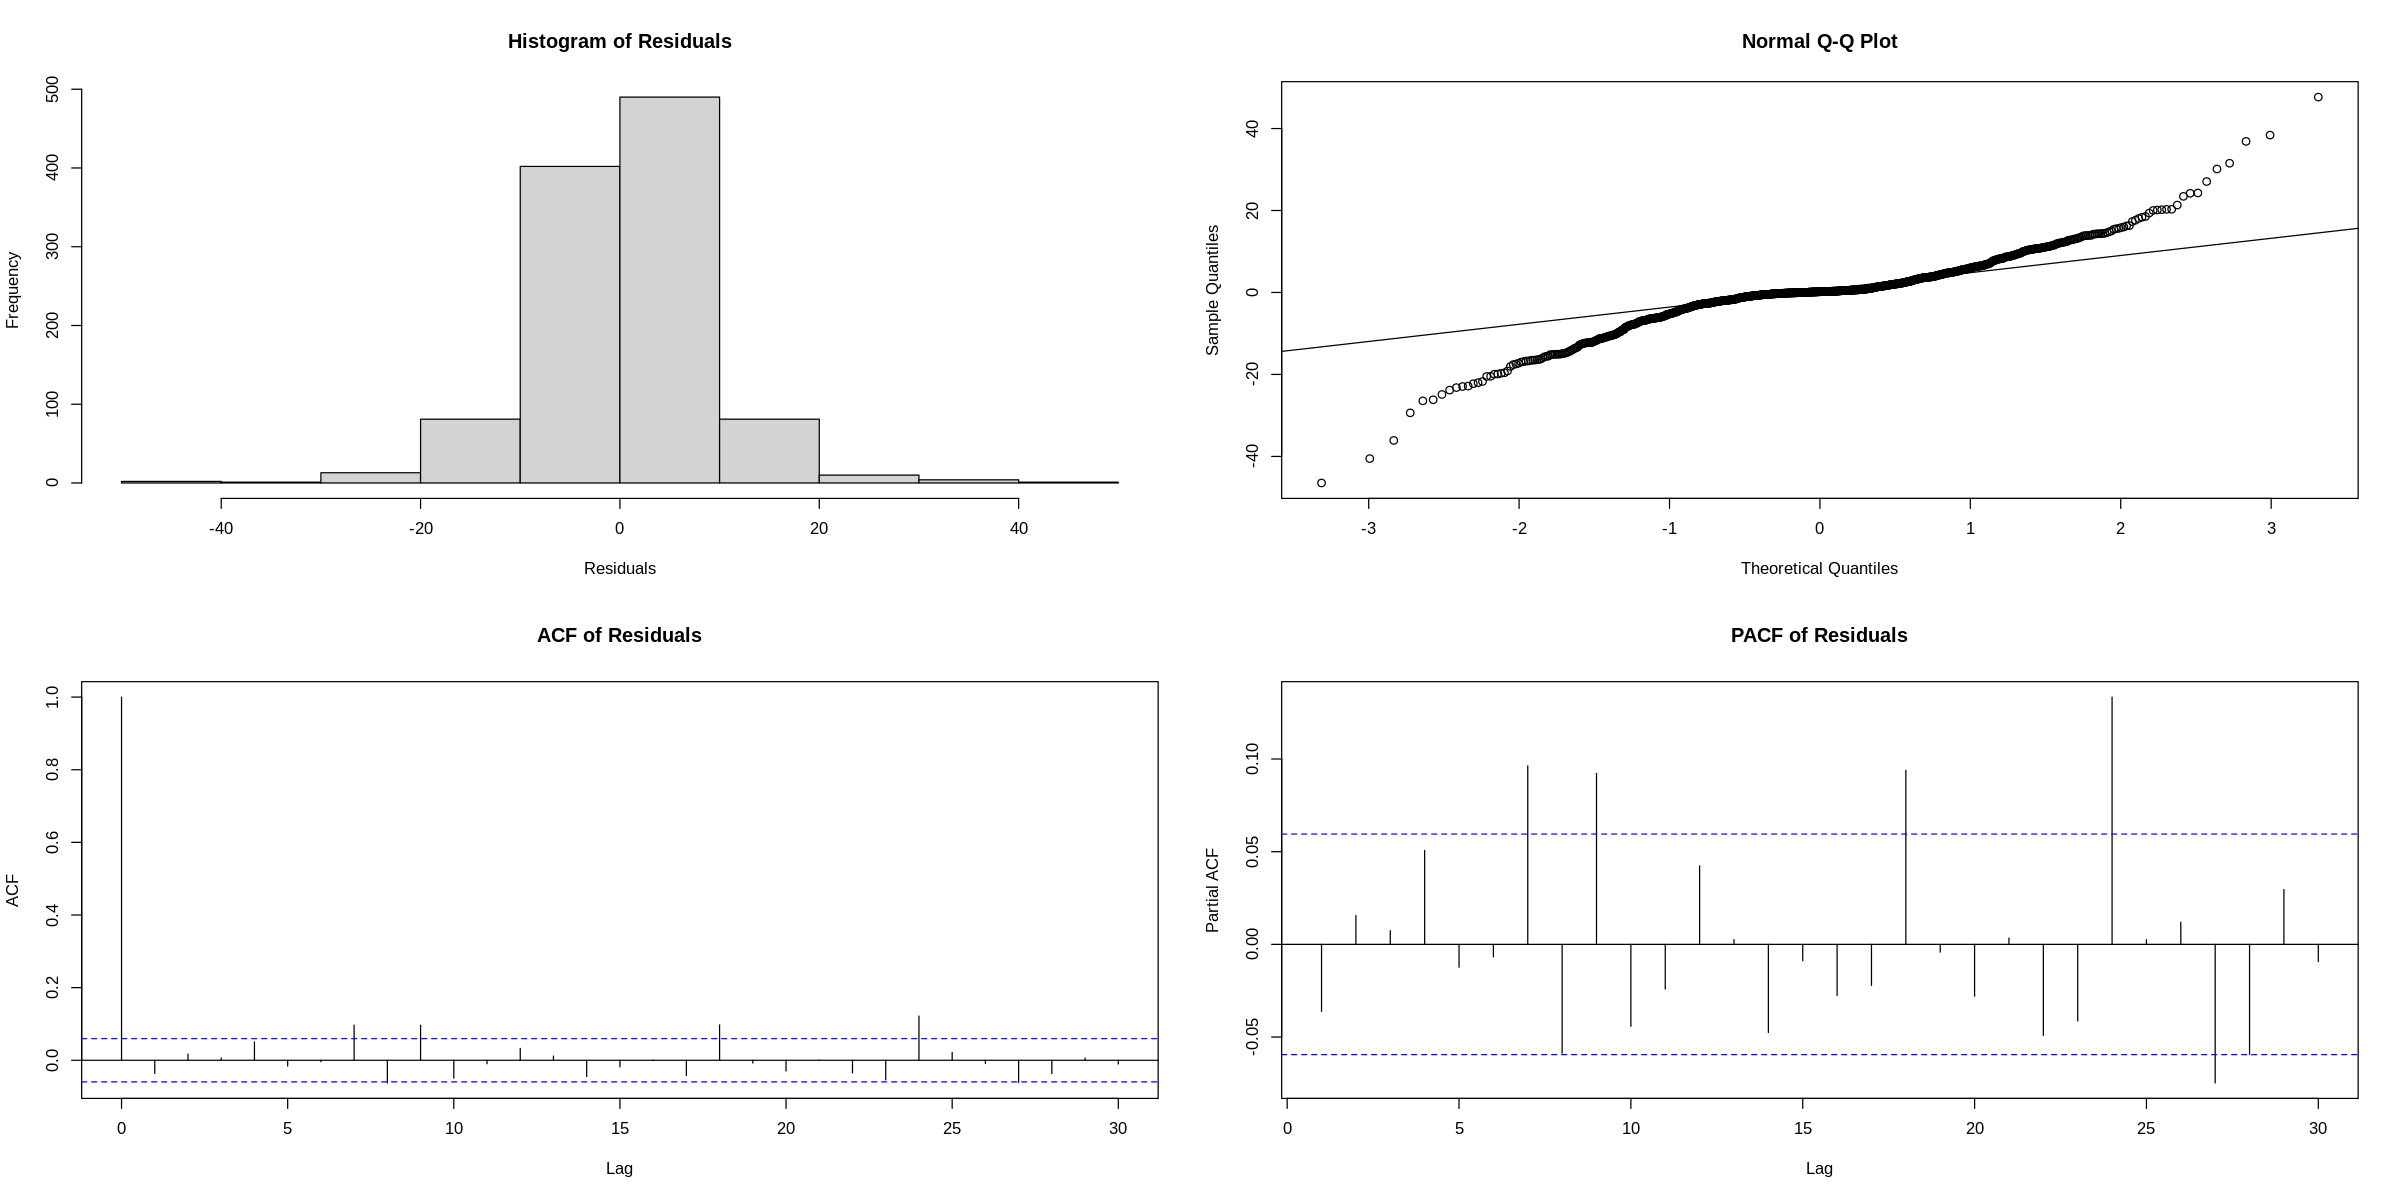

In [ ]:
par(mfrow = c(2,2))
# Plot histogram of residuals
hist(residuals1, main = "Histogram of Residuals", xlab = "Residuals")

# Plot QQ plot of residuals
qqnorm(residuals1)
qqline(residuals1)

# Plot ACF of residuals
acf(residuals1, main = "ACF of Residuals")

# Plot PACF of residuals
pacf(residuals1, main = "PACF of Residuals")


**The histogram** displaying very small values on both the right and left sides suggests that the distribution of residuals is somewhat symmetric but has tails that extend beyond typical values. This could indicate occasional extreme deviations from the model's predictions.

Similarly, the **QQ plot** showing outliers on both the left and right sides further suggests that the residuals deviate from a perfect normal distribution. Outliers on the left indicate larger negative residuals, while outliers on the right indicate larger positive residuals compared to what would be expected under a normal distribution.

**ACF cuts off after lag 0** indicating that there is no significant autocorrelation between the residuals at different lags.

**PACF artifacts** may indicate residuals autocorrelation that the model has faild to capture, this could be due to model misspecification, outliers or anomalies in the data, or the presence of unmodeled seasonal patterns or trends.







**Accessing Randomness of Risiduals**

In [ ]:

# Perform Runs Test for Randomness
runs_test_result <- runs.test(residuals1)

# Print the results
print(runs_test_result)



	Runs Test

data:  residuals1
statistic = -0.66851, runs = 532, n1 = 542, n2 = 542, n = 1084, p-value
= 0.5038
alternative hypothesis: nonrandomness



Since the p-value (0.5038) is greater than the significance level (commonly 0.05), we fail to reject the null hypothesis of randomness. Therefore, based on this test, we do not have sufficient evidence to conclude that the sequence of residuals is nonrandom.

# 2.4 - Model Evaluation and Forecasting

**Model Evaluation**

In [ ]:
# Make predictions on the test data
predictions <- predict(fit1, n.ahead = length(test_data))

# Compute forecast accuracy metrics
accuracy_metrics <- forecast::accuracy(predictions$pred, test_data)

# Print forecast accuracy metrics
print(accuracy_metrics)




                ME     RMSE      MAE       MPE     MAPE
Test set -38.78156 48.88003 39.97305 -18.90387 19.32018



**ME(Mean Error)**: The ME represents the average error of the forecasts. A negative ME indicates that, on average, the forecasts underestimate the actual values by approximately `38.78 units`. In this case, the negative ME suggests that the forecasts tend to be too low on average.

**MPE(Mean Percentage Error)**: The MPE measures the average percentage difference between the forecasts and the actual values. A negative MPE indicates that, on average, the forecasts underestimate the actual values by approximately `18.90%`. It represents the average percentage bias of the forecasts.

**Forecasting**

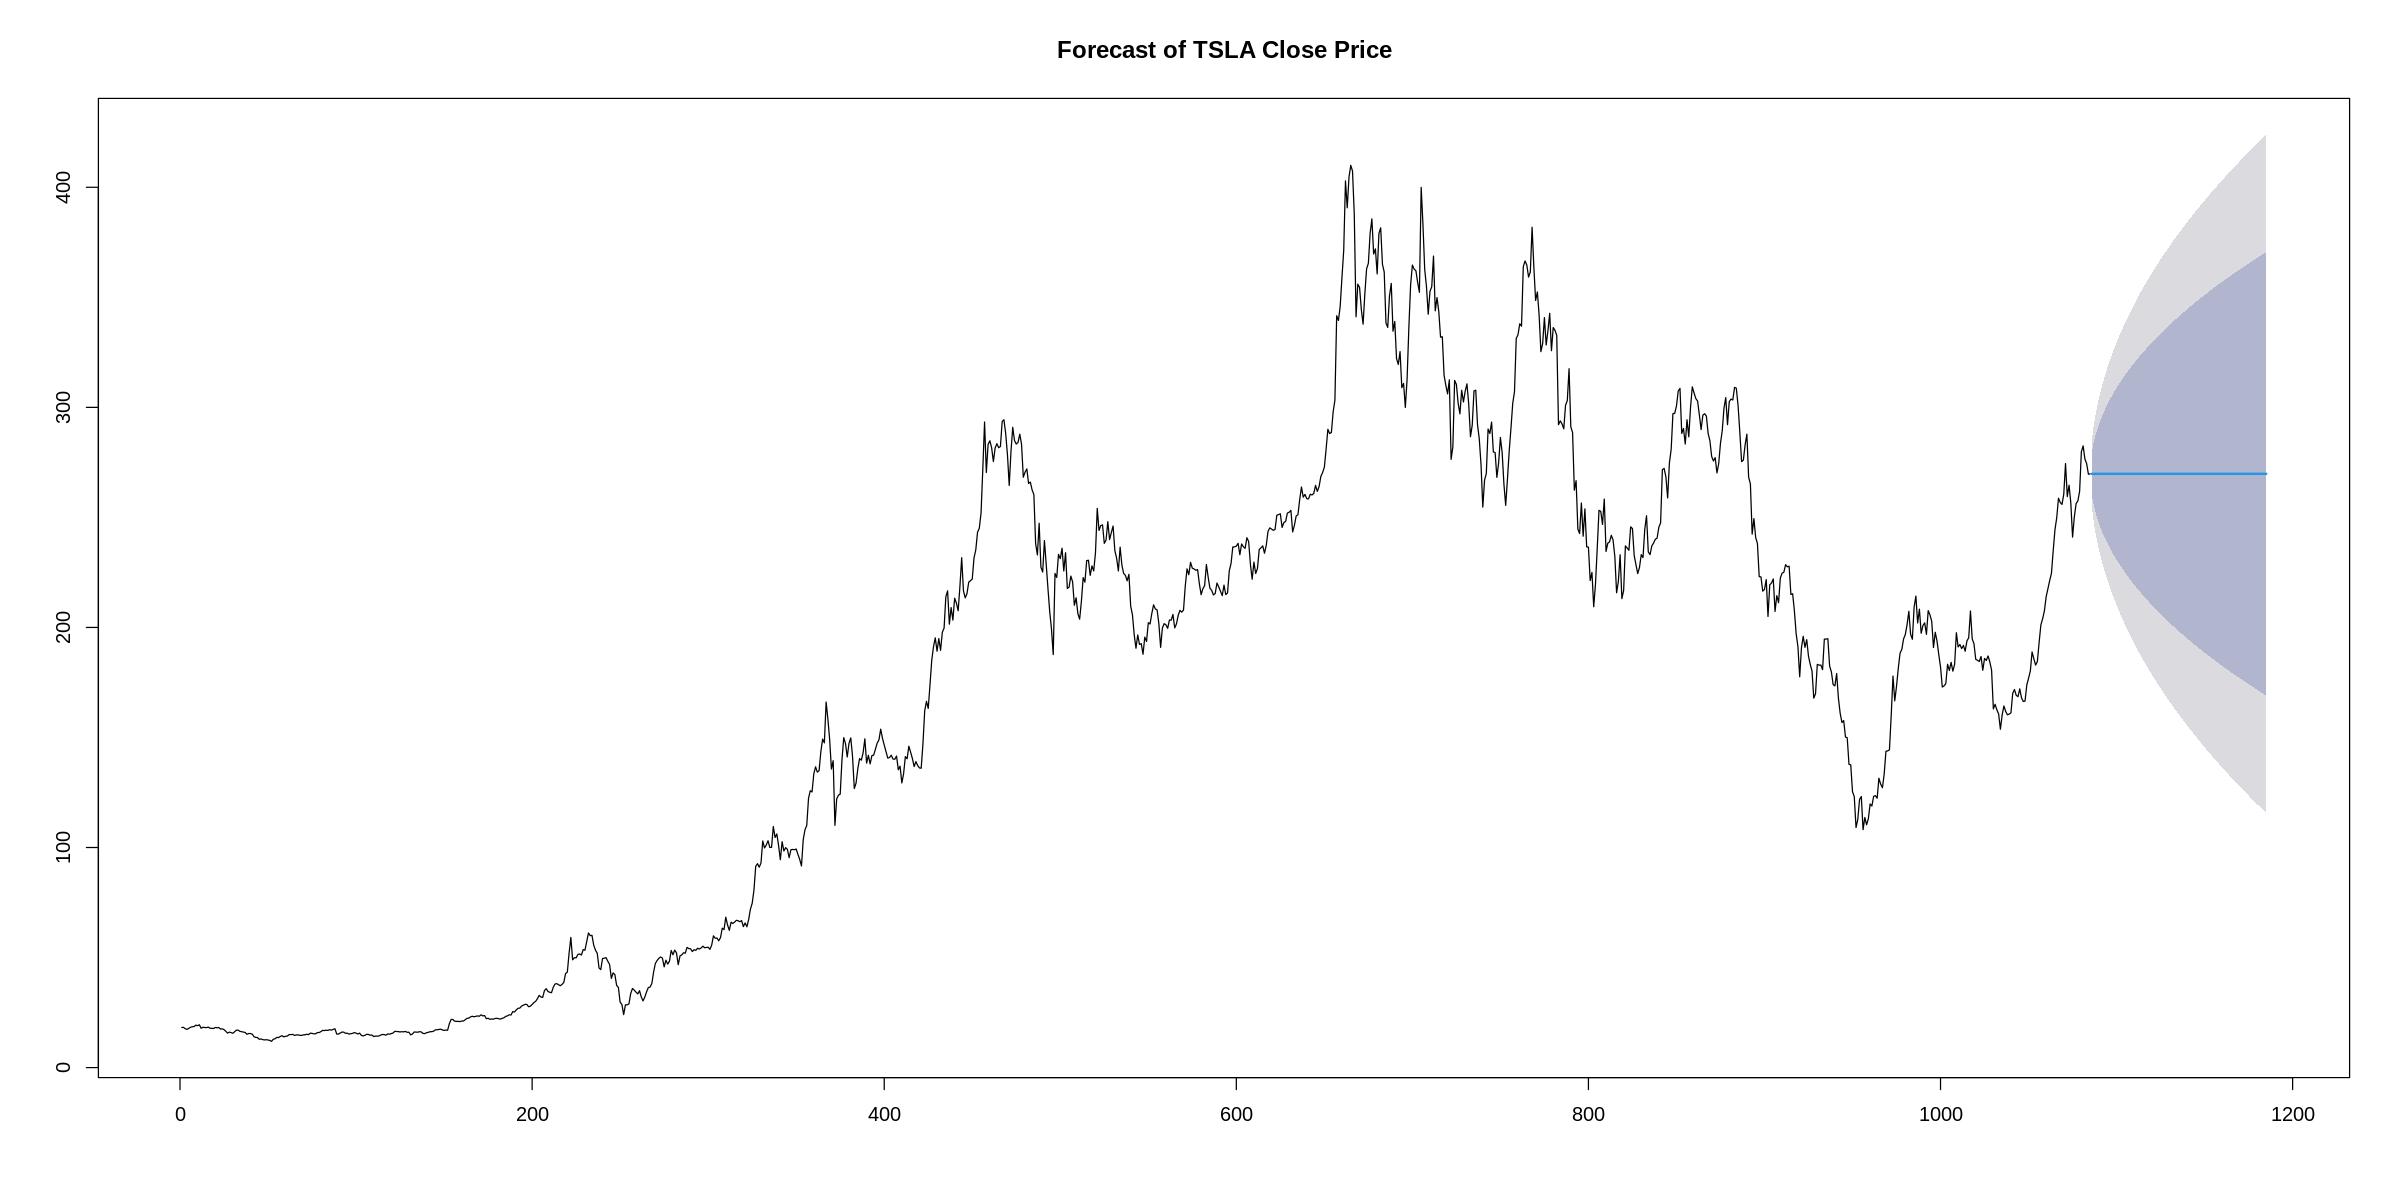

In [ ]:
# Load the forecast package
library(forecast)


# Generate forecasts
forecast_values <- forecast(fit1, h = 100)

# Plot the forecast
plot(forecast_values, main = "Forecast of TSLA Close Price")




The forecast plot appears as a straight line, it suggests that the ARIMA model may not adequately capture the complexity or variability in the data. Possible reasons include model simplicity, inadequate parameter selection, limited data information, unaccounted external factors, or overfitting.

# 3 - Results and Discussion

The main results of this project indicate that the ARIMA model used for forecasting TSLA stock prices has certain limitations. Despite initial model fitting and diagnostic checks, including assessment of residual behavior and forecast accuracy metrics, the model's performance fell short of expectations. The forecast plot appeared as a straight line, suggesting the model's inability to capture the underlying variability in the data. This indicates potential deficiencies in model specification, parameter selection, or consideration of external factors. Further refinement of the model, such as exploring alternative modeling approaches or incorporating additional variables, may be necessary to improve forecast accuracy.